# Hartmann-2021 dataset
[Hartmann, FJ et al. (2021). Single-cell metabolic profiling of human cytotoxic T cells. Nat Biotechnol 39, 186–197](https://www.nature.com/articles/s41587-020-0651-8)

[Download link](https://zenodo.org/record/3951613)

Focused on MIBI-TOF multiplexed images and segmented single-cell data of colorectal carcinoma and healthy adjacent colon tissue.

- MIBI-TOF images have undergone noise removal as described in Keren et al. (2018)
- Cell Segmentation masks for MIBI-TOF data contain large non-cellular regions that need to be removed during downstream processing (Not corrected in this script)
- MIBI-TOF derived single-cell data is cell size normalized, arcsinh transformed and percentile normalized and contains manually annotated FlowSOM clustering results
- Image properties:
  - 1024 x 1024 pixels
  - 400 µm x 400 µm
  - 1100 ± 524 mean spots per image
  - 1 cell per row




In [1]:
# Keep modules updated if they change within the session
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Load modules
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import squidpy as sq
import anndata as ad
import scanpy as sc
import scipy as sp

# Settings
import warnings
warnings.filterwarnings('ignore')
#sc.settings.set_figure_params(dpi=80)

# Print versions
sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

2023-02-07 18:59:38.557643: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-07 18:59:38.679630: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-07 18:59:39.271277: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-07 18:59:39.271366: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.10.0 pandas==1.5.2 scikit-learn==1.2.0 statsmodels==0.13.5 python-igraph==0.10.3 louvain==0.7.1 pynndescent==0.5.8
squidpy==1.2.3


# Import prepped H5AD file

In [6]:
adata = ad.read_h5ad('output-data/hartmann/hartmann.h5ad')

adata

AnnData object with n_obs × n_vars = 63734 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'library_id', 'batch'
    var: 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-10', 'std-10', 'mean-11', 'std-11', 'mean-12', 'std-12', 'mean-13', 'std-13', 'mean-14', 'std-14', 'mean-15', 'std-15', 'mean-16', 'std-16', 'mean-17', 'std-17', 'mean-18', 'std-18', 'mean-19', 'std-19', 'mean-2', 'std-2', 'mean-20', 'std-20', 'mean-21', 'std-21', 'mean-22', 'std-22', 'mean-23', 'std-23', 'mean-24', 'std-24', 'mean-25', 'std-25', 'mean-26', 'std-26', 'mean-27', 'std-27', 'mean-28', 'std-28', 'mean-29', 'std-29', 'mean-3', 'std-3', 'mean-30', 'std-30', 'mean-31', 'std-31', 'mean-32', 'std-32', 'mean-33', 'std-33', 'mean-34', 'std-34', 'mean-35', 'std-35', 'mean-36', 'std-36', 'mean-37', 'std-37', 'mean-38', 'std-38', 'mean-39', 'std-39', 'mean-4', 'std-4', 'mean-40', 'std-40', 'mean-41', 'std-41', 'mean-42', 'std-42', 'mea

### Visualize overall cell-type distribution

Text(0, 0.5, 'Average count')

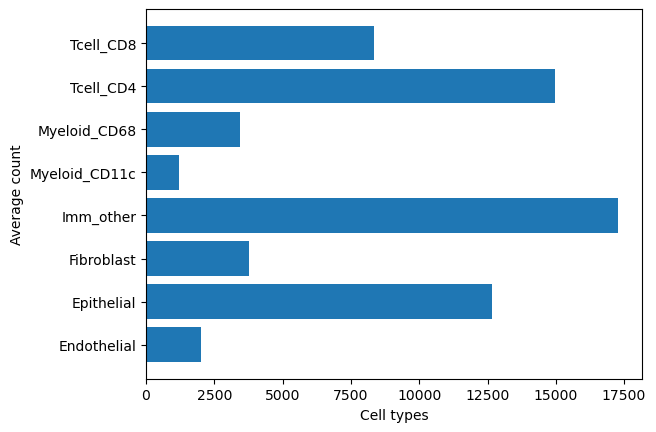

In [7]:
ct_data = np.unique(adata.obs['Cluster'], return_counts=True)
plt.barh(ct_data[0], ct_data[1])
plt.xlabel('Cell types')
plt.ylabel('Average count')

## PCA

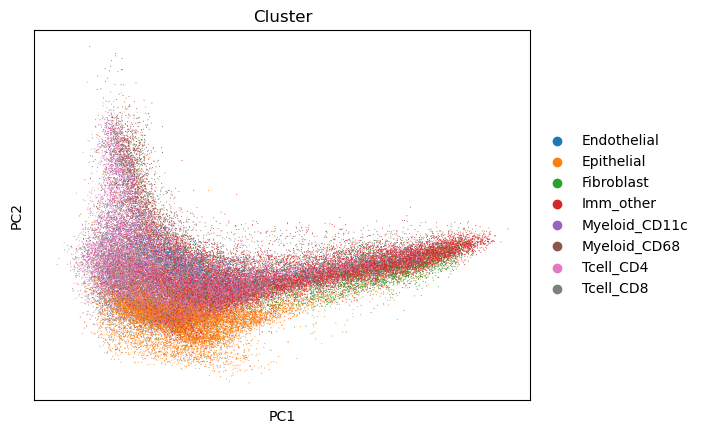

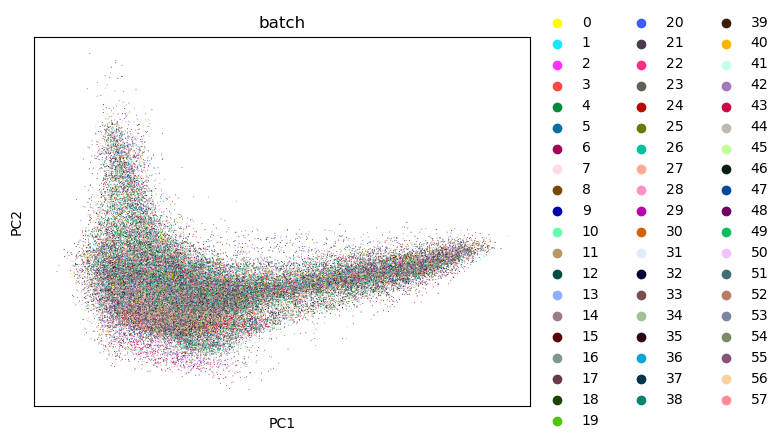

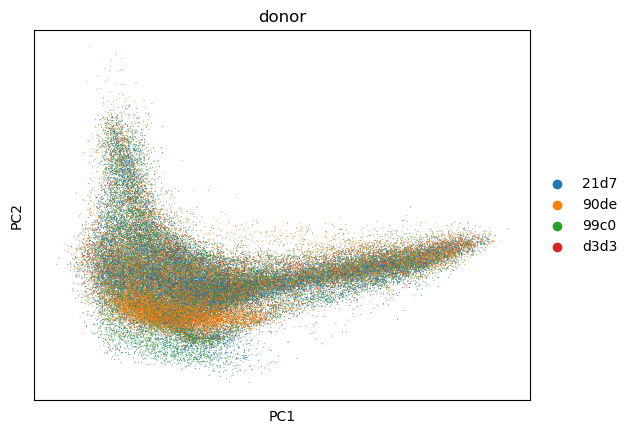

In [ ]:
# PCA
sc.pp.pca(adata)

sc.pl.pca(adata, color='Cluster')
sc.pl.pca(adata, color='batch')
sc.pl.pca(adata, color='donor')


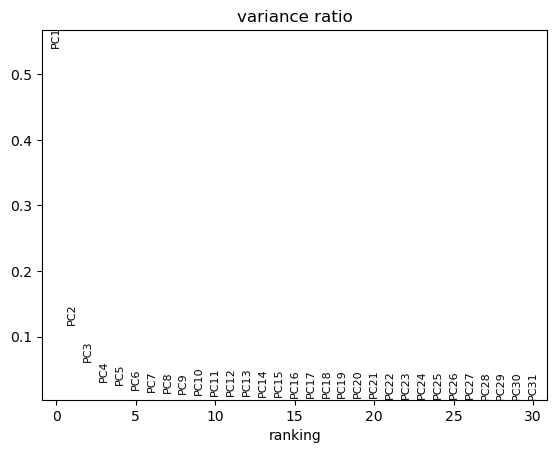

In [ ]:
sc.pl.pca_variance_ratio(adata)

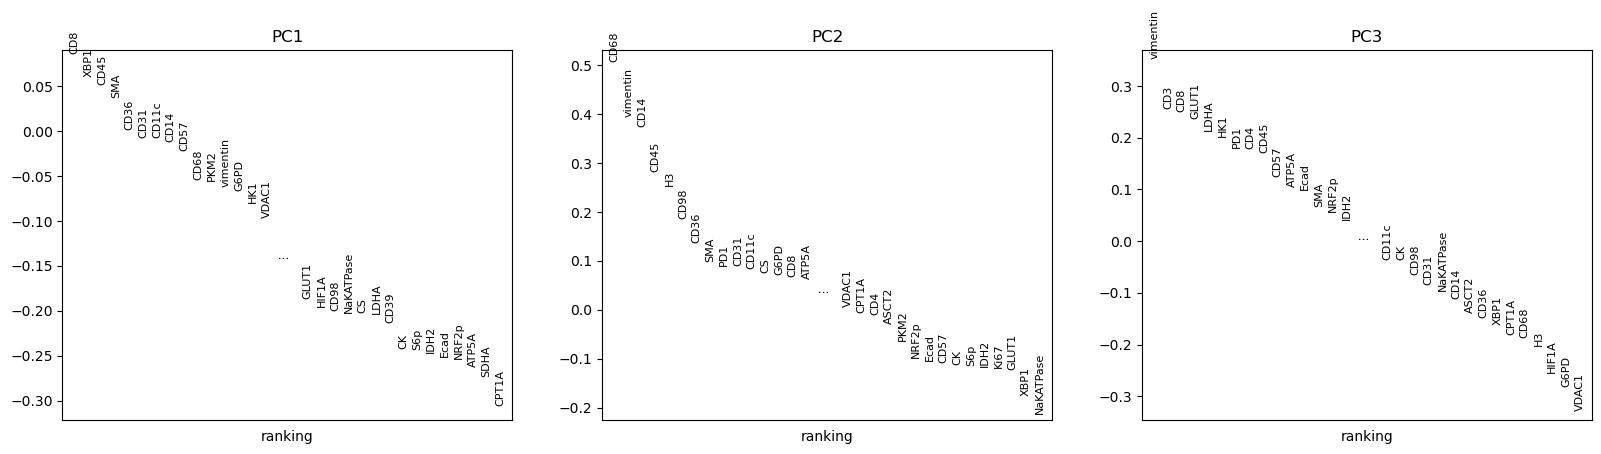

In [ ]:
sc.pl.pca_loadings(adata, components=[1,2,3])

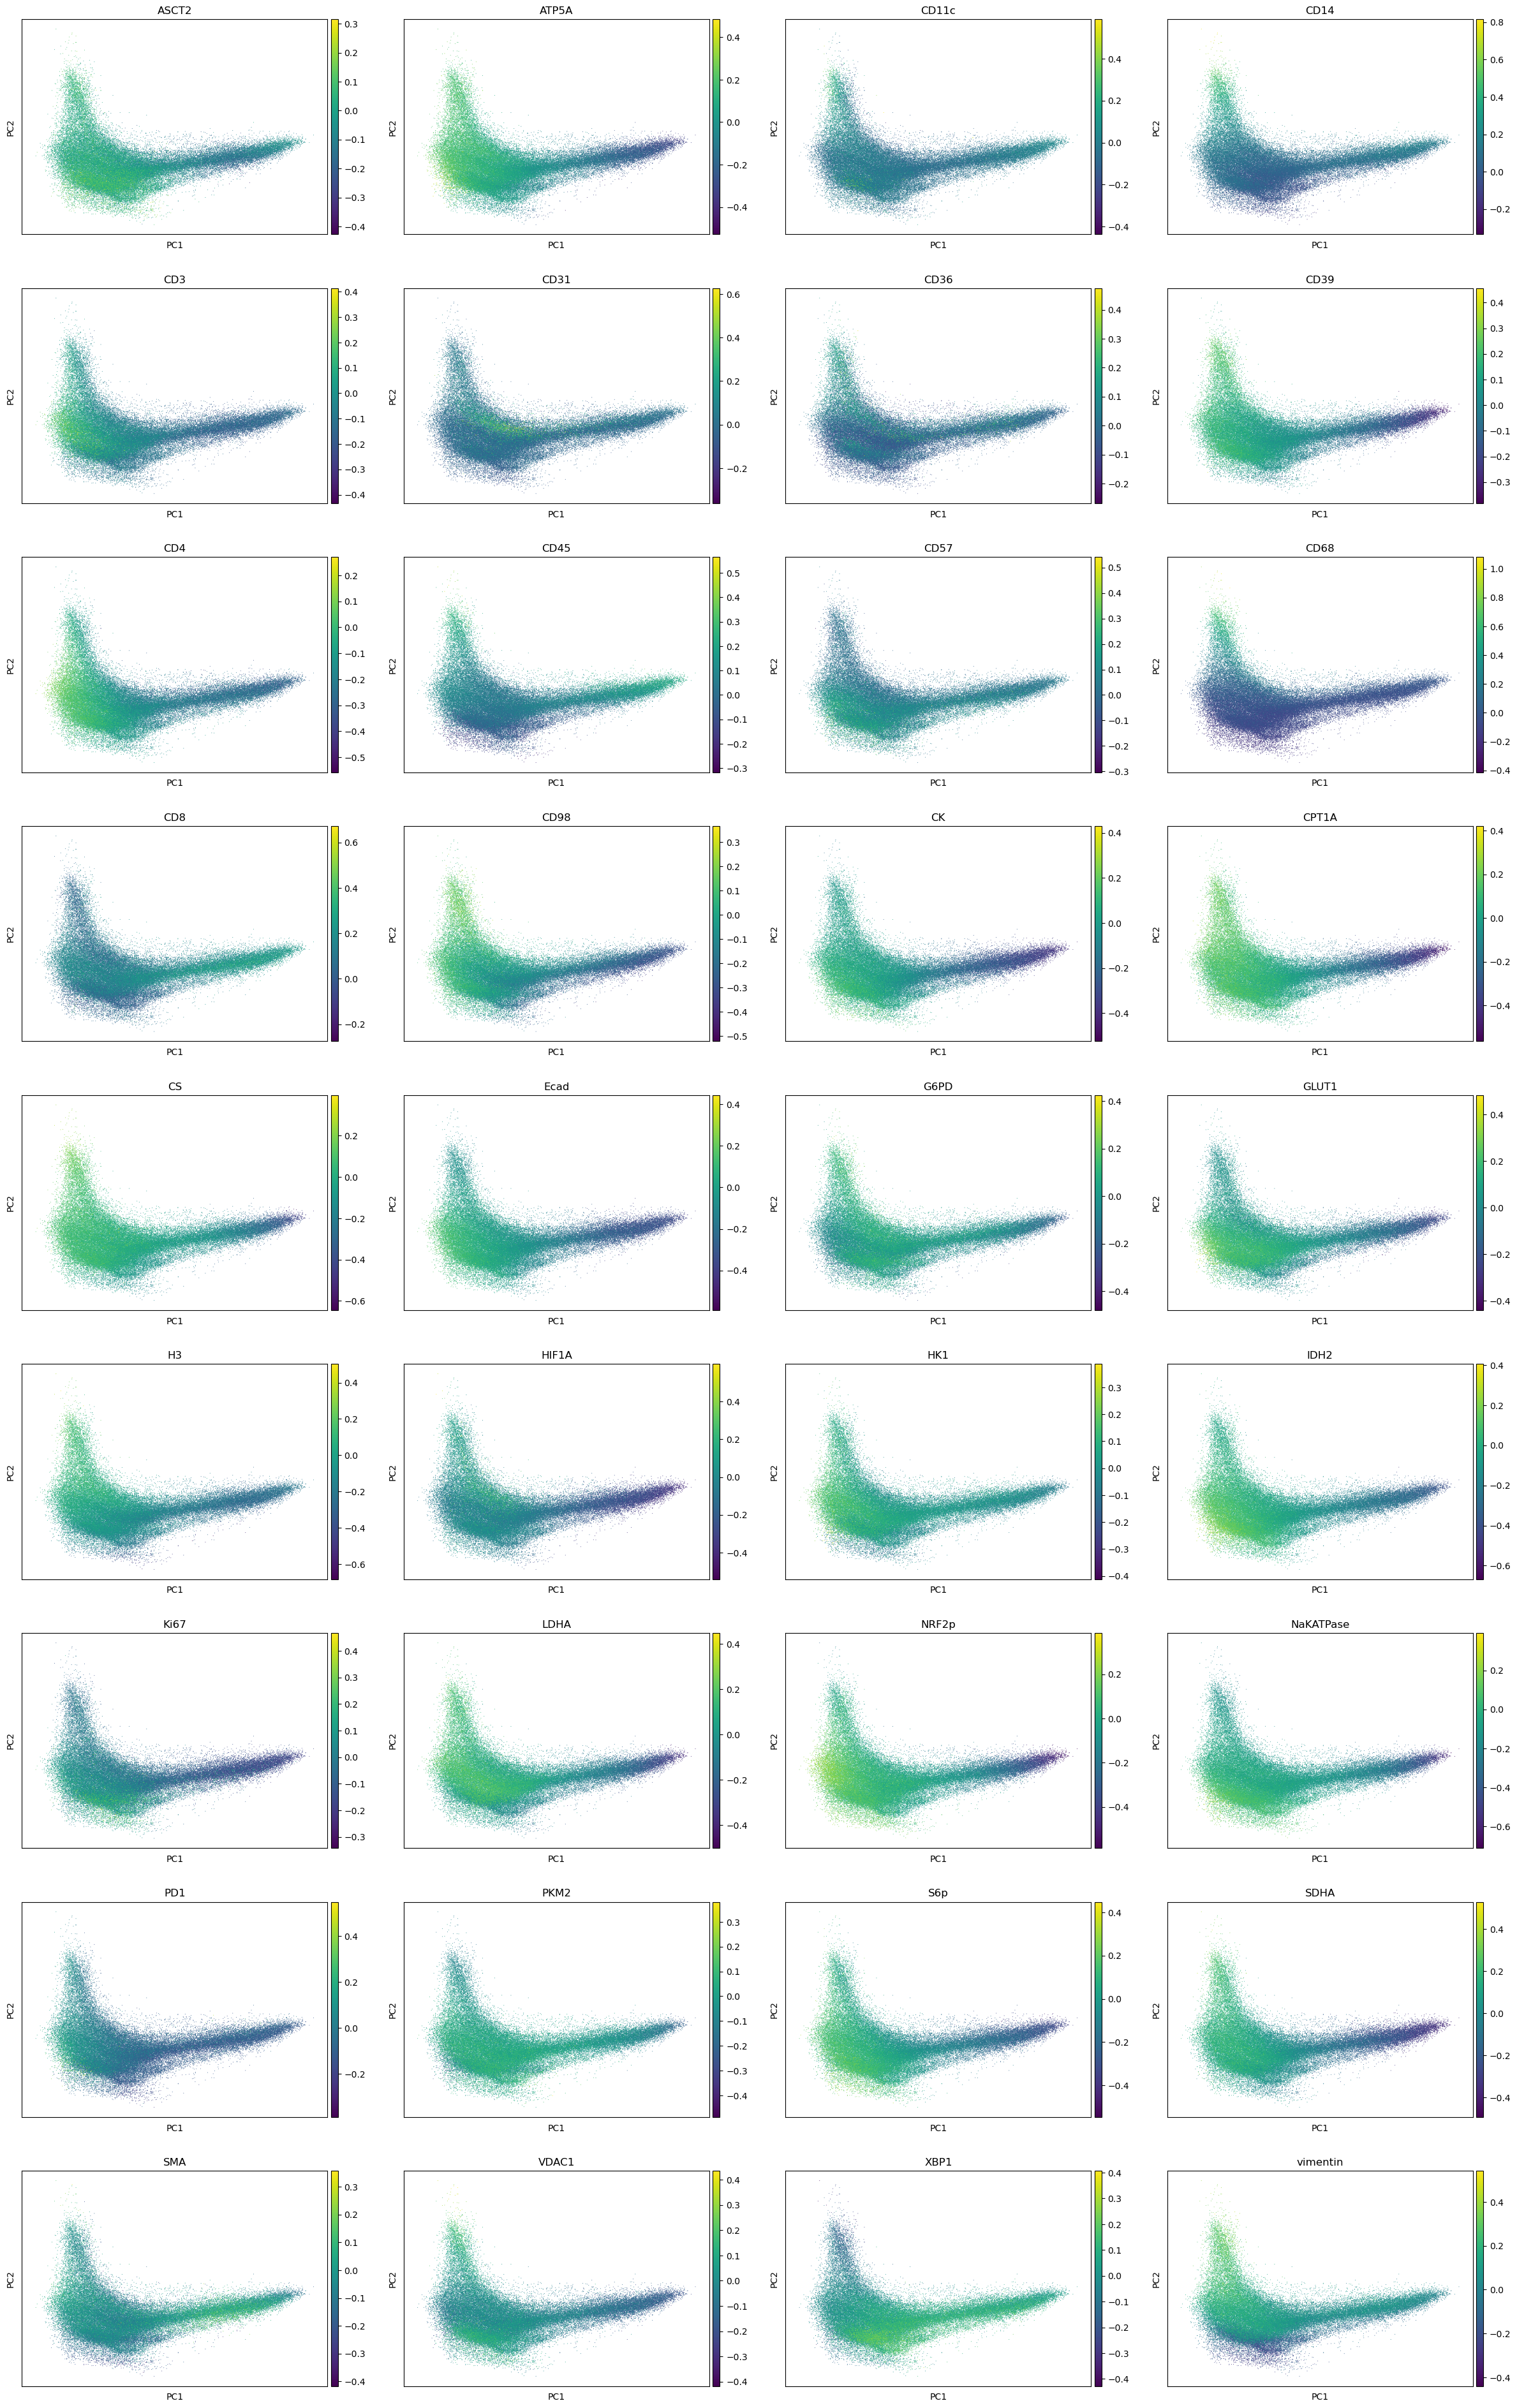

In [ ]:
sc.pl.pca(
    adata, 
    color=[i for i in adata.var_names]
)

In [ ]:
# sc.set_figure_params(figsize=(10, 10))

sc.pl.spatial(
    adata[adata.obs['library_id'] == 'Point8'],
    color="Cluster",
    library_id="Point8",
    img_key="segmentation",
    alpha_img=0.7,
    add_outline=True,
    outline_width=(1.5, 1),
)

KeyError: 'Point8'

In [ ]:
sc.pl.spatial(
    adata[adata.obs['library_id'] == 'Point8'],
    color="Cluster",
    library_id="Point8",
    img_key="hires",
    alpha_img=0.7,
    add_outline=True,
    outline_width=(1.5, 1),
)

In [ ]:
# sc.set_figure_params(figsize=[2,30])

sq.pl.spatial_scatter(adata, color=[None], library_key='library_id', library_id=['Point8', 'Point21', 'Point41', 'Point45'])

# sc.set_figure_params(figsize=[10,10])s

# testing: image correction

In [ ]:
# i = adata.uns['spatial']['Point8']['images']['hires'][:, :, 0]
# j = adata.uns['spatial']['Point8']['images']['hires'][:, :, 1]
# k = adata.uns['spatial']['Point8']['images']['hires'][:, :, 2]

In [ ]:
# plt.imshow(np.log1p(i))

In [ ]:
# plt.imshow(np.log1p(j))

In [ ]:
# plt.imshow(np.log1p(k))

In [ ]:
# k = k
# j = np.where((k>0), 0, j)
# i = np.where((k>0) | (j>0), 0, i)

In [ ]:
# plt.imshow(np.log1p(i))

In [ ]:
# plt.imshow(np.log1p(j))

In [ ]:
# plt.imshow(np.log1p(k))

In [ ]:
# a = np.log1p(i) * (255 / np.log1p(255))
# a = increase_contrast(a, 0, 200)
# plt.imshow(a)

In [ ]:
# b = np.log1p(j) * (255 / np.log1p(255))
# b = increase_contrast(b, 0, 90)
# plt.imshow(b)

In [ ]:
# c = np.log1p(k) * (255 / np.log1p(255))
# c = increase_contrast(c, 120, 180)
# plt.imshow(c)

In [ ]:
# c = c
# b = np.where((c>0), 0, b)
# a = np.where((b>0) | (c>0), 0, a)

In [ ]:
# x = np.where(c > 120, c, b)
# plt.imshow(x)

In [ ]:
# y = np.where(c > 120, c, a)
# plt.imshow(y)

In [ ]:
# z = np.where(b > 80, b, a)
# plt.imshow(z)

In [ ]:
# plt.imshow(np.array([x, y, z]).transpose(1,2,0))

In [ ]:
# plt.imshow(np.array([a, b, c]).transpose(1,2,0))

# Visualize

In [ ]:
sq.pl.spatial_scatter(
    adata,
    color=['Cluster'],
    library_key='library_id',
    library_id=['Point8'],
    scalebar_dx=scale_factor,
    scalebar_kwargs={'scale_loc': 'bottom', 'location': 'lower right'}
)

### Segmentation mask

In [ ]:
sq.pl.spatial_segment(
    adata,
    library_key='library_id',
    library_id=['Point8'],
    seg_cell_id='cell_id',
    color='Cluster',
    scalebar_dx=scale_factor,
    scalebar_kwargs={'scale_loc': 'bottom', 'location': 'lower right'},
)

### Expression under mask

In [ ]:
sq.pl.spatial_segment(
    adata,
    color='CD45', # Immune cell marker (differentiated)
    library_key='library_id',
    library_id=['Point8', 'Point16'],
    img=None,
    seg_cell_id='cell_id',
    cmap='inferno',
    scalebar_dx=scale_factor,
    scalebar_kwargs={'scale_loc': 'bottom', 'location': 'lower right'}
)

# Expression of some specific markers

In [ ]:
sq.pl.spatial_scatter(
    adata,
    color=[None,
           'CD45', # Hematopoietic cells (differentiated)
           'GLUT1', # Glucose transporter
           'CD98', # Amino acid transporter, auth: found polarized towards tumour-immune border
           'ASCT2', # -||-
           'PD1', # Immune activation marker
           'CD39', # -||-
           'CK', # Cancer marker
           ],
    library_key='library_id',
    library_id='Point8',
    scalebar_dx=scale_factor,
    scalebar_kwargs={'scale_loc': 'bottom', 'location': 'lower right'}
)

# Subset for certain methods

In [ ]:
adata_8 = adata[adata.obs['point']==8]
adata_8

# Compute spatial neighbours graph

In [ ]:
sq.gr.spatial_neighbors(adata_8, n_neighs=10, coord_type='generic')

In [ ]:
# No edges shown?
sq.pl.spatial_scatter(
    adata_8,
    color='Cluster',
    library_key='library_id',
    library_id='Point8',
    connectivity_key='spatial_connectivities',
    edges_width=1,
    scalebar_dx=400/1024,
    scalebar_kwargs={"scale_loc": "bottom", "location": "lower right"},
)

In [ ]:
# No edges shown?
sq.pl.spatial_scatter(
    adata_8,
    color='Cluster',
    library_key='library_id',
    library_id='Point8',
    connectivity_key='spatial_connectivities',
    edges_width=1,
    scalebar_dx=400/1024,
    scalebar_kwargs={"scale_loc": "bottom", "location": "lower right"},
    crop_coord=[(200, 200, 300, 300)],
)

# Interaction matrix

In [ ]:
sq.gr.interaction_matrix(adata_8, cluster_key='Cluster')
sq.pl.interaction_matrix(adata_8, cluster_key='Cluster')

In [ ]:
sq.gr.interaction_matrix(adata_8, cluster_key='Cluster', normalized=True)
sq.pl.interaction_matrix(adata_8, cluster_key='Cluster')

# Co-occurence probability

In [ ]:
sq.pl.spatial_scatter(adata, color='Cluster', library_key='library_id', library_id=['Point8'], img=None)

In [ ]:
sq.gr.co_occurrence(adata_8, cluster_key='Cluster', n_jobs=16)

In [ ]:
sq.pl.co_occurrence(adata_8, cluster_key='Cluster', clusters='Epithelial')

# Smooth image!

In image container post processing

# NCEM

Package output:
 - Coupling analysis: DEGs
 - Coupling analysis circular: DEGs or magnitude
 - Sender effect on receiving cell
 - Sender-receiver vulcano plot
 - **Sender similarity analysis**
 - **custom_sender_receiver_

Not functioning:
 - Grid searches over neighbourhood sizes + Length scales of dependencies for different target cell-types
 - (Squidpy CellPhoneDB)

Outlook:
- Future custom loader


In [ ]:
import ncem

### 0. Loading the data with the predefined data loader

In [ ]:
interpreter = ncem.interpretation.interpreter.InterpreterInteraction()
interpreter.get_data(
    data_origin='hartmann', # Reference to specfic DataLoader (see notes in Dropbox paper)
    data_path='input-data/raw-data/Hartmann-2021/',
    radius=35,
    node_label_space_id='type',
    node_feature_space_id='standard',
)
print('\n Celldata metadata:', interpreter.data.celldata.uns['metadata'])

In [ ]:
# node degrees for different radii (real distance)
interpreter.data.plot_degree_vs_dist(
    max_distances=[0, 10, 50, 200, 1000],
    lateral_resolution=400/1024, # Physical cell resolution
)

### 1 Data exploration


##### Variance decomposition

In [ ]:
var_decomp = interpreter.data.compute_variance_decomposition(undefined_type='other')
interpreter.data.variance_decomposition(var_decomp)



In [ ]:
var_decomp.mean(axis=0)[['intra cell type variance', 'inter cell type variance', 'gene variance']]

##### Normalised contact frequencies of cell-types in spatial neighborhoods


In [ ]:
interpreter.data.celldata_interaction_matrix(figsize=(3,3))

#### Distributional characteristics of gene expression measurements of single cells from spatial molecular profiling assays.

In [ ]:
interpreter.data.noise_structure()


### 1. Grid searches over neighbourhood sizes

In [ ]:
# gs = ncem.train.GridSearchContainer(
#     source_path=os.path.join('input-data/raw-data/Hartmann-2021/' + 'grid_searches_gen/'), 
#     gs_ids=[
#         "210419_INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1_HARTMANN",
#         "210419_INTERACTIONS_MAX_NODES_IMAGE_1_HARTMANN",
#     ],
#     lateral_resolution = 400/1024
# )
# gs.load_gs()

# gs.plot_best_model_by_hyperparam(
#     graph_model_class='interactions',
#     baseline_model_class='interactions_baseline',
#     rename_levels = [
#         ("model", {
#             "INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1": "baseline",
#             "INTERACTIONS_MAX_NODES_IMAGE_1": "NCEM",
#         })
#     ],
#     xticks=[0, 10, 50, 200, 1000],
)

#### Length scales of dependencies for different target cell-types.

In [ ]:
# gs.load_target_cell_evaluation()
# gs.plot_target_cell_evaluation(
#     metric_show="r_squared_linreg",
#     metric_select="r_squared_linreg",
#     param_x="um_radius",
# )

### 2. Extracting sender-receiver effects with NCEM

In [ ]:
# splitting data into test and validation sets, can be ignored for non sender-receiver focused analysis
interpreter.split_data_node(0.1, 0.1)
interpreter.n_eval_nodes_per_graph = 10
interpreter.cell_names = list(interpreter.data.celldata.uns['node_type_names'].values())

In [ ]:
interpreter.get_sender_receiver_effects()

### Type coupling analysis

Heatmap color is proportional to the number of differentially expressed genes at a FDR-corrected p-value threshold of 0.05 for each pair of sender and receiver cell types. 

In [ ]:
interpreter.type_coupling_analysis(figsize=(6.5, 5.5))

Edge width proportional to the number of differentially expressed genes at a FDR-corrected p-value threshold of 0.05 for each pair of sender and receiver cell types. Only edges with eat least 24 differentially expressed genes are shown.


**Arrow thickness:** strength of directional dependencies between cell types as the magnitude of the corresponding coefficient vector

In [ ]:
interpreter.type_coupling_analysis_circular(
    edge_attr='magnitude', # IDF: Alternatives should be: ["magnitude", 'de_genes', 'de_genes_abs']
    edge_width_scale=3.5,
    de_genes_threshold=24,
    figsize=(9,9),
    text_space=1.35
)

### IDF: edge thickness = #(DEGs) to relate to the coupling analysis heatmap

In [ ]:
interpreter.type_coupling_analysis_circular(
    edge_attr='de_genes',
    edge_width_scale=3.5,
    de_genes_threshold=1,
    figsize=(9,9),
    text_space=1.35
)

### 3. Directional sender effects for Epithelial cells and CD8 T cells

We dissected these couplings based on the gene-wise effects of all senders on one receiver type for CD8T cells and Epithelial cells which contextualizes differential expression results of the CD8T cell–Epithelial cell axis.

NCEM correctly identifies genes and proteins that play roles in T-cell activation, regulation of T-cell antigen receptor signalling and immune response.

### a) Sender effects on CD8 T cells 

“Sender effect” analysis heatmap for CD8 T cells. Shown is the estimated log fold change that the sender cell type on the x-axis induces in the gene on the y axis in receiving CD8 T cells.

In [ ]:
interpreter.sender_effect(
    receiver='CD8 T cells', 
    gene_subset=['CD8A', 'CD4', 'PTPRC', 'ENTPD1', 'PDCD1', 'CD247'], 
    figsize=(4,5)
)

### b) Sender effects on Epithelial cells

“Sender effect” analysis heatmap for Epithelial cells. Shown is the estimated log fold change that the sender cell type on the y-axis induces in the gene on the x axis in receiving Epithelial cells.

In [ ]:
interpreter.sender_effect(
    receiver='Epithelial', 
    gene_subset=['CD8A', 'CD4', 'PTPRC', 'ENTPD1', 'PDCD1', 'CD247'], 
    figsize=(4,5)
)

### c) Directional effect for sender-receiver axis for CD8 T cells on Epithelial cells 

This analysis contextualizes differential expression results of the CD8 Tcell – Epithelial cell axis.

Volcano plot of differentially expressed genes of Epithelial cells in the neighborhood of CD8 T cells.

In [ ]:
interpreter.sender_receiver_effect_vulcanoplot(
    sender='CD8 T cells', 
    receiver='Epithelial',
    fold_change_threshold=0.04,
    figsize=(3,5)
)

In [ ]:
# low fold change
interpreter.sender_receiver_values(
    sender='CD8 T cells', 
    receiver='Epithelial'
).sort_values(by='fold change').head(5)

In [ ]:
# high fold change
interpreter.sender_receiver_values(
    sender='CD8 T cells', 
    receiver='Epithelial'
).sort_values(by='fold change', ascending=False).head(5)

### d) Squidpy: Ligand-receptor interactions
Again, these core associations are reproduced by CellphoneDB. However only on receptor signaling genes. The shown result can be extracted with Squidpy.

NCEM is not limited to receptor signaling genes only.

In [ ]:
# interpreter.data.ligrec(
#     fraction=0.70,
# )

### 4. Sender similarity analysis for Epithelial cells

“Sender similarity analysis” of all sender cell types with respect to Epithelial cell receivers. Shown is a clustered heatmap of Pearson correlation coefficients of the coefficient vectors of each sender type that corresponds to Epithelial cell receivers.

T cell clusters and other immune cells had a similar effect on Epithelial cells in a “sender similarity analysis”, in which we correlated the coefficient vectors of sender cell types that correspond to Epithelial cell receivers, which demonstrates conservation of cell type identity in the sender profile.

In [ ]:
interpreter.sender_similarity_analysis(receiver='Epithelial')

### 5. Custom directional sender-receiver graph

`cusom_effect_graph()`

Basis for custom wrapper
 - Equivalent to type-coupling analysis but introducing two optional parameters:
    - q-value threshold
    - fold-change threshold


In [ ]:
# Custom wrapper function
def ncem_sender_receiver_interactions(
    radius: int=35,
    n_eval_nodes: int=10,
    qval_thresh: float=0.05, 
    l1_thresh: int=0,
    fc_thresh=[0.00, 0.00],
    l2_thresh=0,
    plot: bool=True
    ):
    '''
    Calculates a custom sender-receiver graph based on interpreter.sender_effect()
     affected gene numbers per sender-receiver pair.

    Prerequisites:
     - import ncem
     - know what data loader you want to use
     - spatial data directories and files structured after the data loaders structure

    Input
     - Spatial features data
     - Parameters:
        - qval_thresh: FDR corrected p-value to be used as an upper-bound significance threshold
           (both L1 and L2 arrays)
        - l1_thresh: Minimum number of significant genes threshold for the L1 array.
        - fc_thresh:
            - Option 1: a list of two int or float numbers to be used as an upper-bound (first number)
               and lower-bound (second number)
               thresholds for the original coefficient values (only applied to L2 array).
            - Option 2: an int or float number. Assuming a normal distribution of coefficient values,
               the number indicates the standard deviation to be used as a cutoff. Only values above and
               below the mean +/- the standard deviation will be included (only on L2 norm array).
        - l2_thresh:
            - Option 1: Lower-bound threshold for computed L2 norm values (L2 array only).
            - Option 2: Use a specific percentile as a lower-bound threshold for computed
               L2 norm values (L2 array only).
               Notation str('AXX'), where 'A' is short for 'Above' and the 'XX' are strictly
               two numbers (int) to be considered as the lower-bound percentile threshold.

    Output:
     - List of 2 numpy arrays:
        - 1. Type-coupling (Sender-receiver effect) interaction matrix
            L1 norm of the number of significant interaction terms per cell
        - 2. Sender-receiver magnitude effect interaction matrix
            L2 norm of interacton term coefficients of genes per cell
        - dim(cell-types x cell-types)
            - [receiver, sender]
    '''

    # Some relevant variables
    clusters = interpreter.cell_names
    num_clusters = len(clusters)
    vars = interpreter.data.var_names
    num_vars = len(vars)
    qvals = interpreter.qvalues

    # interpreter.fold_change
    #  - numpy array of shape [8, 8 , 36] = [receiver clusters, sender clusters, features]
    #  - dtype=float32



    # L1-signigicance interaction matrix

    l1_effects = interpreter.fold_change

    # Filter out genes under corrected qval
    l1_effects = l1_effects * (qvals < qval_thresh)

    # L1 norm AKA Count genes > 0 per sender-receiver pair
    l1_effects = np.sum(l1_effects != 0, axis=2)

    # Filter out sender-receiver effects A.K.A node edges > nr_genes_thresh
    l1_effects = np.where(l1_effects > l1_thresh, l1_effects, np.zeros([num_clusters, num_clusters]))

    np.fill_diagonal(l1_effects, 0)



    # L2-coefficient interaction matrix

    l2_effects = interpreter.fold_change

    # Filter out genes under/over fc_thresh

    try:

        if isinstance(fc_thresh, list) & (len(fc_thresh) == 2) & isinstance(fc_thresh[0], (int, float)) & isinstance(fc_thresh[1], (int, float)):

            l2_effects = np.where((l2_effects < fc_thresh[0]) | (l2_effects > (fc_thresh[1])), l2_effects, np.zeros([num_clusters, num_clusters, num_vars]))

    except: 

        if isinstance(fc_thresh, (int, float)):
            
            mean = np.mean(l2_effects)
            std = np.std(l2_effects)

            l2_effects = np.where((l2_effects < (mean - (fc_thresh * std))) | (l2_effects > (mean + (fc_thresh * std))), l2_effects, np.zeros([num_clusters, num_clusters, num_vars]))
        
        else:
            raise Exception(f'{fc_thresh} doesnt comply with possible parameter types.')


    # Filter out genes under corrected qval
    print(qvals[3,5, 16])
    print(qval_thresh)
    print("Before")
    print(l2_effects[3,5,16])
    l2_effects = l2_effects * (qvals < qval_thresh)
    print("After")
    print(l2_effects[3,5,16])
    qvals = np.where(qvals < 0.01, qvals, np.zeros([8,8,36]))
    print(sp.stats.describe(qvals.flatten()))

    # L2 norm
    l2_effects = np.sqrt(np.sum(l2_effects ** 2, axis=-1))

    # Filter out sender-receiver effects A.K.A L2 score > l2_thresh
    if isinstance(l2_thresh, (int, float)):

        l2_effects = np.where(l2_effects > l2_thresh, l2_effects, np.zeros([num_clusters, num_clusters]))
    
    elif isinstance(l2_thresh, str) & len(l2_thresh) == 3:
        
        try:

            _ = l2_thresh[0] == 'A'
            int_number = int(l2_thresh[1, 3])

            percentile =  np.percentile(l2_effects, int_number)

            l2_effects = np.where(l2_effects > percentile, l2_effects, np.zeros([num_clusters, num_clusters]))


        except ValueError:

            print('l2_thresh doesnt comply with the parameter possibilities.')
    
    else:

        print('l2_thresh doesnt comply with the parameter possibilities.')

    np.fill_diagonal(l2_effects, 0)


    # Heatmap
    if plot == True:

        fig, (ax0, ax1) = plt.subplots(1, 2, sharex=True)

        im0 = ax0.imshow(l1_effects, cmap='gray_r')
        im1 = ax1.imshow(l2_effects, cmap='gray_r')
        ax0.set_title('Sender-receiver effects:\nL1(significance)')
        ax1.set_title("Sender-receiver effects:\nL2(interaction terms)")

        for ax in fig.get_axes():
            
            ax.set_xlabel('Senders')
            ax.set_xticks([i for i in range(0,8)])
            ax.set_xticklabels(interpreter.cell_names, rotation=90)

            ax.set_ylabel('Receivers')
            ax.set_yticks([i for i in range(0,8)])
            ax.set_yticklabels(interpreter.cell_names)

            ax.label_outer()

        fig.colorbar(im0, ax=ax0, shrink=0.49)
        fig.colorbar(im1, ax=ax1, shrink=0.49)

        plt.show()

    return [l1_effects, l2_effects]

In [ ]:
# Applying the function
ncem_interactions = ncem_sender_receiver_interactions(
    radius=35,
    n_eval_nodes=10,
    qval_thresh=0.05,
    l1_thresh=0,
    fc_thresh=0,
    l2_thresh=0
)
